<a href="https://colab.research.google.com/github/Sharath-Sabbani/Minor-Project/blob/main/Wheat_District_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price Prediction of Crops

## Importing Libraries:
To Work on this Project we will be using few Python libraries such as -
1.   Numpy : NumPy is mostly used for working with Numerical values as it makes it easy to apply mathematical functions and also To work with any dimension Arrays with out much complexity.
2.   Pandas : Pandas is mostly used for data analysis tasks in Python i.e, To work with DataFrame of ".csv" files and to manipulate contents in a table.
3.   Matplot (matplotlib) : 'matplotlib.pyplot' is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure like creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc..
4.   Scikit Learn (sklearn) : 'linear_model' and 'model_selection' are classes of the sklearn module they contain different functions for performing machine learning with linear models. The term linear model implies that the model is specified as a linear combination of features.
'linear_model' class is used to import Linear Regression class which is used to predict the values. 'model_selection' class is used to import train_test_split subclass to Split the dataset into both training set and test set



In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing Datasets
Dataset we are using has 60 entries with 4 parameter for each crop. They are Month, Year, Rainfall and the Crop WPI (Wholesale Price Index).
We are forecasting WPI for 4 crops (Paddy, Cotton, Wheat, Groundnut).

In [40]:
data_set = pd.read_csv("Wheat_District_Price_Sheet1.csv")    # dataset is loaded into data_set variable using pd object of pandas library
data_set.head()                         # first five entries of dataset

,MONTH,YEAR,HYD_RAIN,HYD_PRICE,KARIMNAGAR_RAIN,KARIMNAGAR_PRICE
0,1,2013,6.2,1430.0,16.6,1289.0
1,2,2013,6.3,1400.0,16.6,1320.0
2,3,2013,6.3,1400.0,16.6,1279.0
3,4,2013,29.0,1300.0,11.6,1217.0
4,5,2013,29.2,1400.0,11.7,1255.0


In [44]:
Hyd = data_set.iloc[:,:3]
Hyd["HYD_PRICE"]=data_set.HYD_PRICE           # splitting dataset into Paddy dataset
Hyd.head()

,MONTH,YEAR,HYD_RAIN,HYD_PRICE
0,1,2013,6.2,1430.0
1,2,2013,6.3,1400.0
2,3,2013,6.3,1400.0
3,4,2013,29.0,1300.0
4,5,2013,29.2,1400.0


In [45]:
Karimnagar = data_set.iloc[:,:3]
Karimnagar["KARIMNAGAR_PRICE"]=data_set.KARIMNAGAR_PRICE        # splitting dataset into Cotton dataset
Karimnagar.head()

,MONTH,YEAR,HYD_RAIN,KARIMNAGAR_PRICE
0,1,2013,6.2,1289.0
1,2,2013,6.3,1320.0
2,3,2013,6.3,1279.0
3,4,2013,29.0,1217.0
4,5,2013,29.2,1255.0


## District Selection

In [47]:
District = Hyd              # Selected District for price prediciton

## Handling Missing Data
Data is not always availabe in some cases. So we have difficulty in filling the cells to complete a data set. This missing data can be handled using statictical methods. Such as Mean, Median, Mode, Deviation. In python the missing values are by default read as NaN.
Nan stands for Not a Number. It is a special floating-point value that represents a missing or undefined value. NaN cannot be converted to any other type than float.

In [48]:
District.isnull().sum()         # checking if there are any null values

MONTH        0
YEAR         0
HYD_RAIN     0
HYD_PRICE    1
dtype: int64

In [49]:
District[District.HYD_PRICE.isnull()]

,MONTH,YEAR,HYD_RAIN,HYD_PRICE
87,4,2020,22.2,NaN


In [71]:
dummy =pd.DataFrame([[]])       # creeating a empty data frame to append result
for i in range (1,13):
  temp = pd.DataFrame(District[District.MONTH == i])                # temp variable has respective month data set
  temp.HYD_PRICE.fillna(temp.HYD_PRICE.mean(),inplace=True)   # Nan is filled with mean values of respective column
  dummy = pd.concat([dummy,temp])     # dummy variable is used to concatanate the monthly data set to form a complete crop dataset

In [67]:
dummy.reset_index(drop=True,inplace=True)
dummy.drop(0,inplace=True)

In [68]:
dummy.reset_index(drop=True,inplace=True)
dummy.isnull().sum()           # checking if there are any more null values

MONTH        0
YEAR         0
HYD_RAIN     0
HYD_PRICE    0
dtype: int64

In [69]:
District = dummy

In [70]:
District[District.YEAR == 2020]           # All Nan values are replaced with Numerical values

,MONTH,YEAR,HYD_RAIN,HYD_PRICE
7,1.0,2020.0,8.0,1900.000000
17,2.0,2020.0,8.1,1800.000000
27,3.0,2020.0,8.5,1900.000000
37,4.0,2020.0,22.2,1548.888889
47,5.0,2020.0,22.2,2000.000000
57,6.0,2020.0,22.2,1800.000000
67,7.0,2020.0,262.8,2000.000000
77,8.0,2020.0,262.9,2100.000000
87,9.0,2020.0,262.8,1500.000000
97,10.0,2020.0,130.2,1400.000000


## Training the Model

We are Training the data using Multiple Linear Regression as there are 3 Independent Variables.

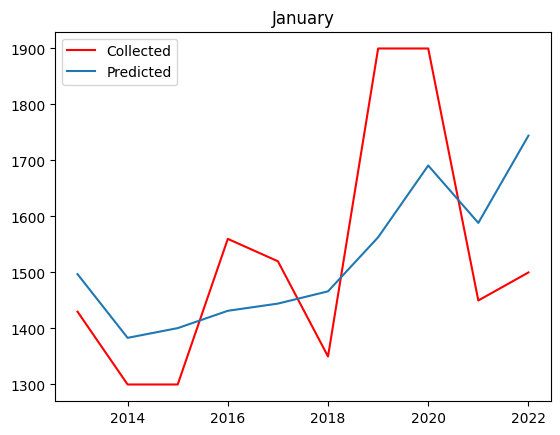

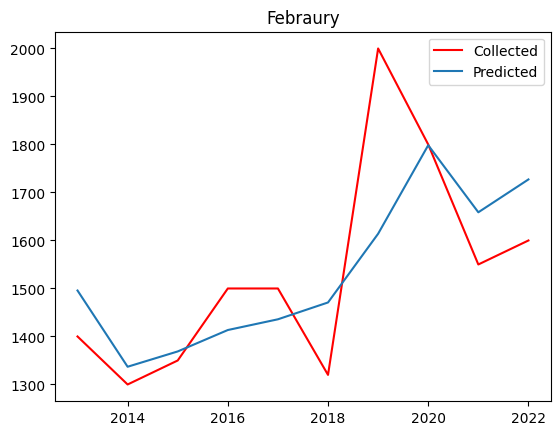

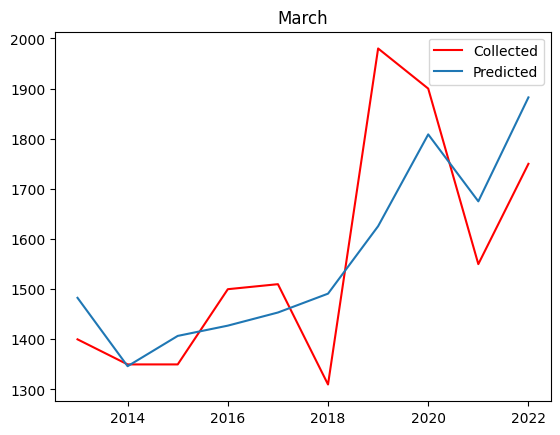

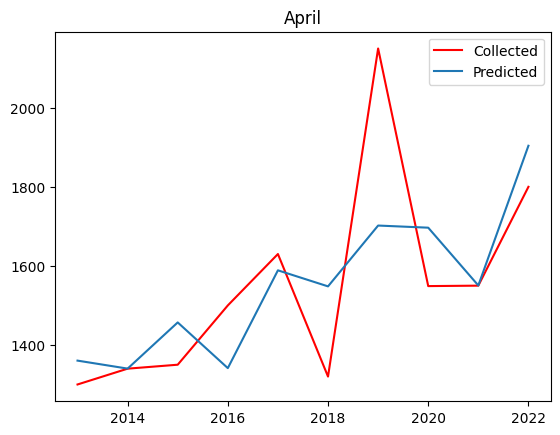

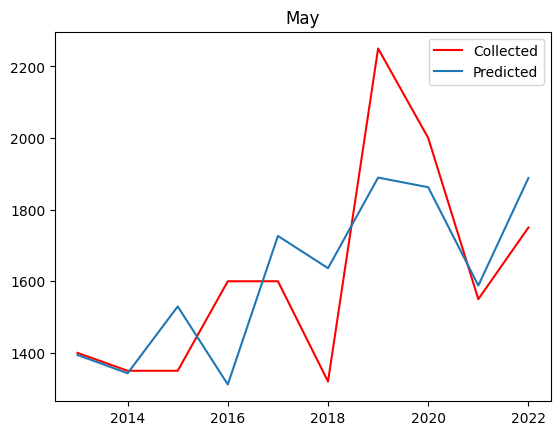

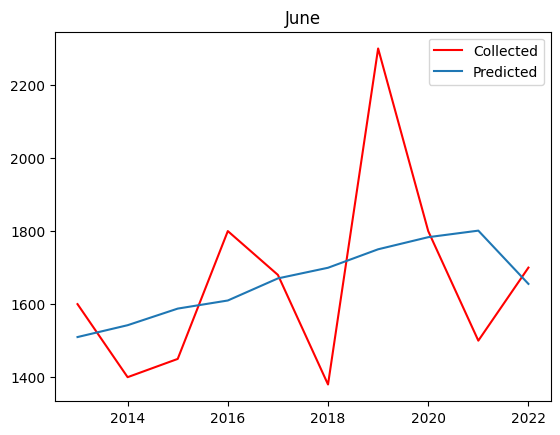

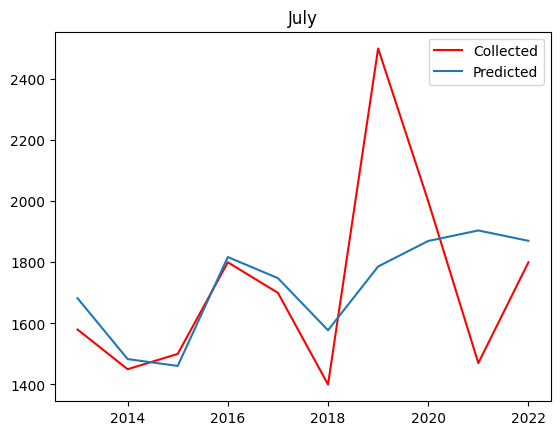

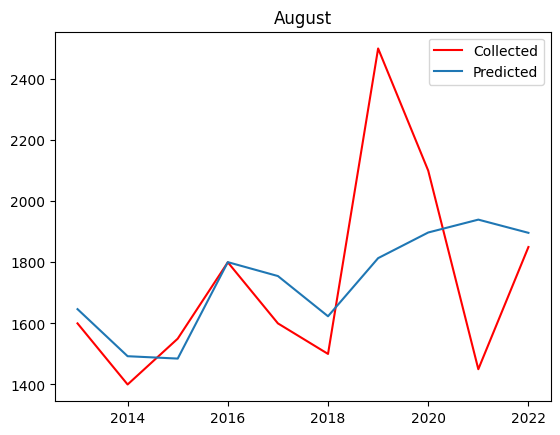

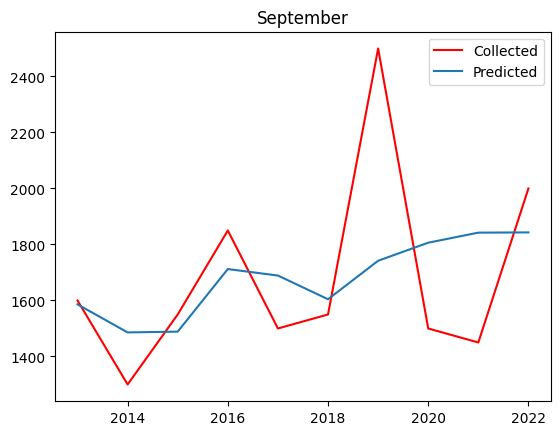

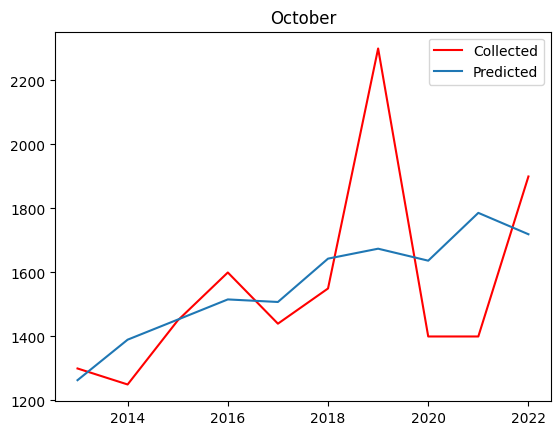

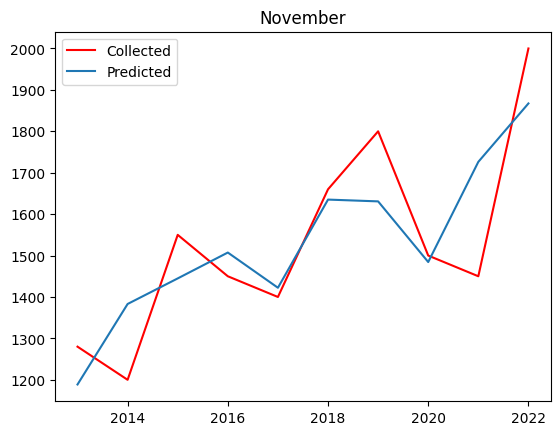

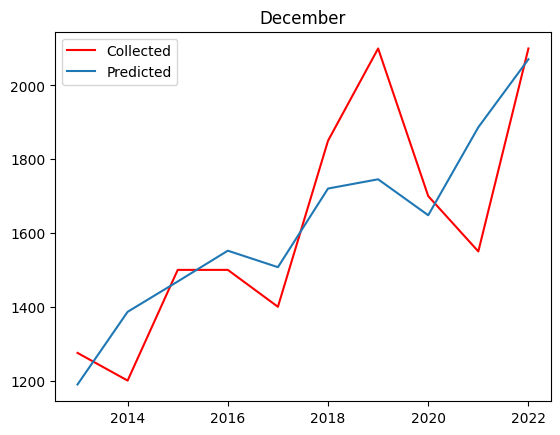

In [56]:
for i in range(1,13):
  month_split = District[District.MONTH == i]
  X = month_split.iloc[:,:3]                # Independent Variable Dataset
  Y = month_split.iloc[:,-1]                # Depedent Variable Dataset

  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.6,random_state=42+i)   # Splitting data into Training set and test set

  # As there are less entries training set is not used for traing the model.

  regressor = LinearRegression()            # Creating Object by calling Constructor
  regressor.fit(X,Y)                        # Training the model
  def switch(lang):
    if lang == 1:
        return "January"
    elif lang == 2:
        return "Febraury"
    elif lang == 3:
        return "March"
    elif lang == 4:
        return "April"
    elif lang == 5:
        return "May"
    elif lang == 6:
        return "June"
    elif lang == 7:
        return "July"
    elif lang == 8:
        return "August"
    elif lang == 9:
        return "September"
    elif lang == 10:
        return "October"
    elif lang == 11:
        return "November"
    elif lang == 12:
        return "December"
  name = switch(i)
  plt.title(name);
  plt.plot(X["YEAR"],Y,"r",label="Collected")                       # Plot of the collected values
  plt.plot(X["YEAR"],regressor.predict(X),label="Predicted")      # Plot of the Predicted Values
  plt.legend()
  plt.show()
  # plt.title(name)
  # plt.plot(X_train["Year"],Y_train,"r",label="Trained")
  # plt.plot(X_train["Year"],regressor.predict(X_train),label="Predicted")
  # plt.legend()
  # plt.show()

## Predicting the price

In [59]:
Y_Pred = regressor.predict([[6.0,2024.0,22.54]])     # Predicting the WPI for 6th month in 2024 with Estimating rainfall of 160.54
Y_Pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2196.5025344])

## Accuracy

In [60]:
from sklearn.metrics import r2_score              # r square method is used to measure the accuracy in Regression
a = r2_score(np.array(Y).reshape(-1,1),np.array(regressor.predict(X)).reshape(-1,1))
print(round(a,2)*100)                             # Accuracy in Percentage

65.0
